## Importando os documentos e as bibliotecas necessárias

In [1]:
#from google.colab import files
#uploaded = files.upload()
#upando os arquivos em xlsx

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import requests
import warnings
warnings.filterwarnings('ignore')

## Pré-processamento dos dados



In [3]:
data_train = pd.read_excel('abalone_dataset.xlsx')
data_test = pd.read_excel('abalone_app.xlsx')

In [4]:
data_train.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


In [5]:
data_test.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.600,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,F,0.545,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,F,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,M,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,F,0.655,0.540,0.215,1.5555,0.6950,0.2960,0.4440


In [6]:
data_train.sex.unique()

array(['M', 'I', 'F'], dtype=object)

In [7]:
data_test.sex.unique()

array(['M', 'F', 'I'], dtype=object)

### Arredondando os valores



In [8]:
data_train.round(4)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1
...,...,...,...,...,...,...,...,...,...
3127,F,0.545,0.405,0.175,0.9800,0.2585,0.2070,0.3800,3
3128,M,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450,3
3129,I,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.1200,1
3130,F,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.2350,3


In [9]:
data_test.round(4)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.600,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,F,0.545,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,F,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,M,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,F,0.655,0.540,0.215,1.5555,0.6950,0.2960,0.4440
...,...,...,...,...,...,...,...,...
1040,I,0.430,0.350,0.105,0.3660,0.1705,0.0855,0.1100
1041,F,0.475,0.360,0.125,0.4470,0.1695,0.0810,0.1400
1042,F,0.500,0.405,0.150,0.5965,0.2530,0.1260,0.1850
1043,I,0.380,0.275,0.095,0.2425,0.1060,0.0485,0.2100


### Convertendo string para inteiro


In [10]:
def string2int(sex):
  if sex == 'M':
    sex = 0
  elif sex == 'F':
    sex = 1
  else:
    sex = 2
  return sex

data_train['sex'] = data_train.sex.apply(string2int)
data_test['sex'] = data_test.sex.apply(string2int)

In [11]:
data_test.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0,0.600,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,1,0.545,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,1,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,0,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,1,0.655,0.540,0.215,1.5555,0.6950,0.2960,0.4440


In [12]:
feature_cols = ['sex','length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight','shell_weight']
X = data_train[feature_cols]
y = data_train.type

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## SVM

In [14]:
cl_svm = LinearSVC().fit(X_train, y_train)
y_pred_svm = cl_svm.predict(X_test)

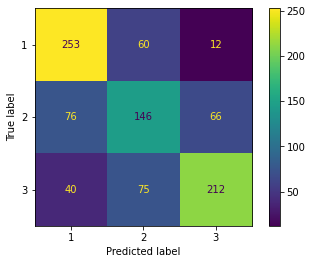

In [15]:
plot_confusion_matrix(cl_svm, X_test, y_test)
plt.show()

In [16]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Classificador SVM\nAcurácia: {:.3f}\nPrecisão: {:.3f}\nRecall: {:.3f}\nF1 Score: {:.3f}\n".format(accuracy_svm, precision_svm, recall_svm, f1_svm))

Classificador SVM
Acurácia: 0.650
Precisão: 0.651
Recall: 0.650
F1 Score: 0.648



## Regressão Logística

In [17]:
cl_logistic = LogisticRegression().fit(X_train, y_train)
y_pred_lr = cl_logistic.predict(X_test)

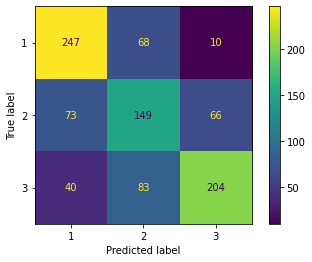

In [18]:
plot_confusion_matrix(cl_logistic, X_test, y_test)
plt.show()

In [19]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("Classificador Regressão Logística\nAcurácia: {:.3f}\nPrecisão: {:.3f}\nRecall: {:.3f}\nF1 Score: {:.3f}\n".format(accuracy_lr, precision_lr, recall_lr, f1_lr))

Classificador Regressão Logística
Acurácia: 0.638
Precisão: 0.643
Recall: 0.638
F1 Score: 0.638



## Naive Bayes

In [20]:
cl_nb = GaussianNB().fit(X_train, y_train)
y_pred_nb = cl_nb.predict(X_test)

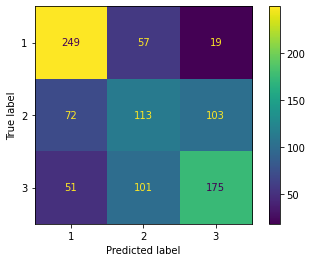

In [21]:
plot_confusion_matrix(cl_nb, X_test, y_test)
plt.show()

In [22]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print("Classificador Naive Bayes\nAcurácia: {:.3f}\nPrecisão: {:.3f}\nRecall: {:.3f}\nF1 Score: {:.3f}\n".format(accuracy_nb, precision_nb, recall_nb, f1_nb))

Classificador Naive Bayes
Acurácia: 0.571
Precisão: 0.564
Recall: 0.571
F1 Score: 0.566



## Random Forest

In [23]:
cl_rf = RandomForestClassifier(random_state=0, max_depth=7).fit(X_train, y_train)
y_pred_rf = cl_rf.predict(X_test)

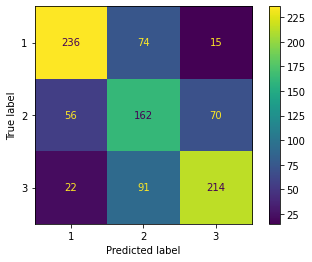

In [24]:
plot_confusion_matrix(cl_rf, X_test, y_test)
plt.show()

In [25]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Classificador Random Forest\nAcurácia: {:.3f}\nPrecisão: {:.3f}\nRecall: {:.3f}\nF1 Score: {:.3f}\n".format(accuracy_rf, precision_rf, recall_rf, f1_rf))

Classificador Random Forest
Acurácia: 0.651
Precisão: 0.661
Recall: 0.651
F1 Score: 0.655



In [26]:
svm_results = [accuracy_svm, precision_svm, recall_svm, f1_svm]
lr_results = [accuracy_lr, precision_lr, recall_lr, f1_lr]
nb_results = [accuracy_nb, precision_nb, recall_nb, f1_nb]
rf_results = [accuracy_rf, precision_rf, recall_rf, f1_rf]

data_results = {
    'SVM': svm_results,
    'Regressão Logística': lr_results,
    'Naive Bayes': nb_results,
    'Random Forest': rf_results,
}

index_values = ['accuracy', 'precision', 'recall', 'f1']
pd.set_option('display.max_columns', None)

df_results = pd.DataFrame(data_results, index=index_values)

df_results

,SVM,Regressão Logística,Naive Bayes,Random Forest
accuracy,0.650000,0.638298,0.571277,0.651064
precision,0.650550,0.642839,0.564155,0.660624
recall,0.650000,0.638298,0.571277,0.651064
f1,0.648371,0.638441,0.566021,0.654640


In [27]:
##alterar p servidor das coisas de validação
'''
print(' - Aplicando modelo e enviando para o servidor')
data_test = data_test[feature_cols]
y_pred = cl_rf.predict(data_test)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/03_Validation.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "shantay u stay"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")
'''

 - Aplicando modelo e enviando para o servidor
 - Resposta do servidor:
 {"status":"success","dev_key":"shantay u stay","accuracy":0.6688995215311004,"old_accuracy":0} 

